In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

/home/aegis/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# @njit
def unoccupied(lattice):
    unoccupied_list = []
    for x in range(lattice.shape[0]):
        for y in range(lattice.shape[0]):
            if lattice[x, y] == 0:
                unoccupied_list.append((x, y))
    return unoccupied_list


# @njit
def are_u_happy(lattice, p, level_seg_ave):
    unhappy_list = []
    level_seg = []
    for x in range(lattice.shape[0]):
        for y in range(lattice.shape[0]):
            person = lattice[x, y]
            if person in [-1, 1]:
                person_pos = (x, y)
                happy_level = check_n(person, lattice, person_pos)
                level_seg.append(happy_level)
                if happy_level < p:
                    unhappy_list.append((x, y))
    level_seg_ave.append(np.mean(level_seg))
    return unhappy_list
# @njit
def check_n(person, lattice, person_pos):
    x = person_pos[0]
    y = person_pos[1]
    counter_same = 0
    counter_not_same = 0
    pos_nei = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (-1, 1), (-1, -1), (1, -1)]
    for pos in pos_nei:
        if lattice[(x+pos[0])%L, (y + pos[1])%L] == person:
            counter_same += 1
        elif lattice[(x+pos[0])%L, (y + pos[1])%L] == -person:
            counter_not_same += 1
    if (counter_same + counter_not_same) == 0:
        return 0
    else:
        return counter_same/(counter_same + counter_not_same)

# @njit
def transfer_unhappy(lattice, unhappy_list, unccupied_list):
    for i, unhappy in enumerate(unhappy_list):
        person = lattice[unhappy[0], unhappy[1]]
        lattice[unhappy[0], unhappy[1]] = 0
        unccupied_list.append((unhappy[0], unhappy[1]))
        chosen = unccupied_list.pop(np.random.choice(range(len(unccupied_list))))
        lattice[chosen[0], chosen[1]] = person
    

In [7]:
p_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.71, 0.72, 0.7499, 0.75, 0.8]
L = 50
lattice_info_start = []
lattice_info_end = []
unoccupied_start_list = []
level_seg_per_p = []
for p in p_list:
    lattice = np.random.choice([0, -1, +1], size=(L, L), p=[0.1, 0.45, 0.45])
    lattice_info_start.append(lattice)
    unoccupied_start_list.append(np.sum(lattice==0))
    unccupied_list = unoccupied(lattice)
    level_seg_ave = []
    for _ in range(100):
        # Check unoccupied
        # unccupied_list = unoccupied(lattice)
        if len(unccupied_list) != len(unoccupied(lattice)):
            print("wait")
            while True:
                print()
        unhappy_list = are_u_happy(lattice, p, level_seg_ave)
        transfer_unhappy(lattice, unhappy_list, unccupied_list)
        # print("end",len(unccupied_list), len(unoccupied(lattice)))
    level_seg_per_p.append(level_seg_ave)
    lattice_info_end.append(lattice)

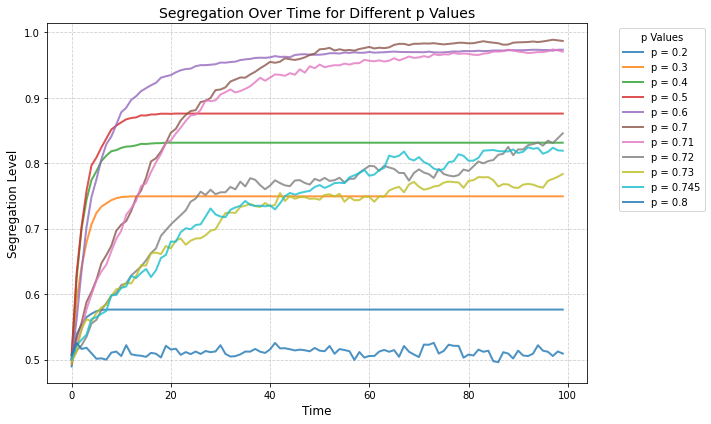

In [8]:
plt.figure(figsize=(10, 6))  # Set figure size

for i, p in enumerate(p_list):
    plt.plot(level_seg_per_p[i], label=f"p = {p}", linewidth=2, alpha=0.8)  # Improved styling

plt.xlabel("Time", fontsize=12)
plt.ylabel("Segregation Level", fontsize=12)
plt.title("Segregation Over Time for Different p Values", fontsize=14)
plt.legend(title="p Values", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.grid(True, linestyle="--", alpha=0.6)  # Add grid for readability
plt.tight_layout()  # Adjust layout to fit everything nicely

plt.show()

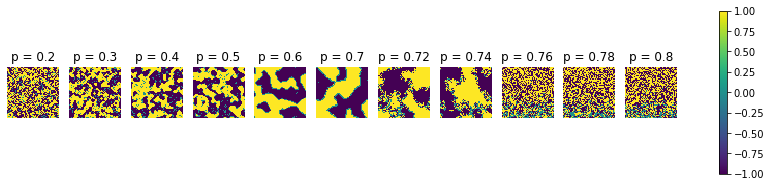

In [5]:
fig, axes = plt.subplots(1, len(lattice_info_end), figsize=(15, 5))

for ax, lattice, p in zip(axes, lattice_info_end, p_list):
    im = ax.imshow(lattice, cmap="viridis", interpolation="none")
    ax.set_title(f"p = {p}")
    ax.axis("off")

plt.colorbar(im, ax=axes.ravel().tolist(), shrink=0.6)
plt.show()


In [6]:
print(unoccupied_start_list[-1])
print(len(unoccupied(lattice_info_end[-1])))

245
245
